In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB #Naive bayes

In [29]:
#hos= pd.read_csv("haberman.data")
#header= pd.read_csv("haberman.names")

names =  ['Age' , 'year_of_operation','positive_axillary_nodes','Survival_status']
hos = pd.read_csv("haberman.data", na_values=[" ?"],
                         header=None, 
                         names = names)
hos.head()

,Age,year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
hos.isnull().sum()

Age                        0
year_of_operation          0
positive_axillary_nodes    0
Survival_status            0
dtype: int64

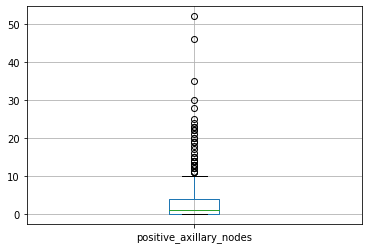

In [31]:
b=hos.boxplot("positive_axillary_nodes")

In [32]:
drop_elements = ['Survival_status']
y = hos["Survival_status"]
X = hos.drop(drop_elements, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X.shape

(306, 3)

In [34]:
y.shape

(306,)

In [35]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [36]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
y_predict = logreg.predict(X_test_scaled)
model_score = logreg.score(X_test_scaled, y_test)
print('confusion matrix is',metrics.confusion_matrix(y_test, y_predict))
print('The accuracy of the Logistic Regression is', score_logreg)
#precision = precision_score(X_test,y_test)

confusion matrix is [[41  4]
 [14  3]]
The accuracy of the Logistic Regression is 0.7419354838709677


C:\Users\arun.gopalakrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7096774193548387
